# TP noté - Business Process Analytics

- Le TP peut se faire seul ou en binôme uniquement. <br>
- Le TP est à rendre pour le `30 décembre 2020 minuit` au plus tard. Si le TP est rendu à la fin de la séance du 10 novembre, un bonus de 1 point sera attribué au groupe. <br>
> Compléter directement le notebook puis renommez le avec vos noms+prenoms avant l'envoi. 

La notation du TP est donné à titre d'indication. Si le barème est changé lors de la correction, vous serez informés. 

# 1. Modèle

Trouvez le modèle M1.pnml dans l'archive ainsi que le log L1.xes. Les commandes ci-dessous vous permettent d'afficher le modèle :

Saving L1.xes to L1 (10).xes


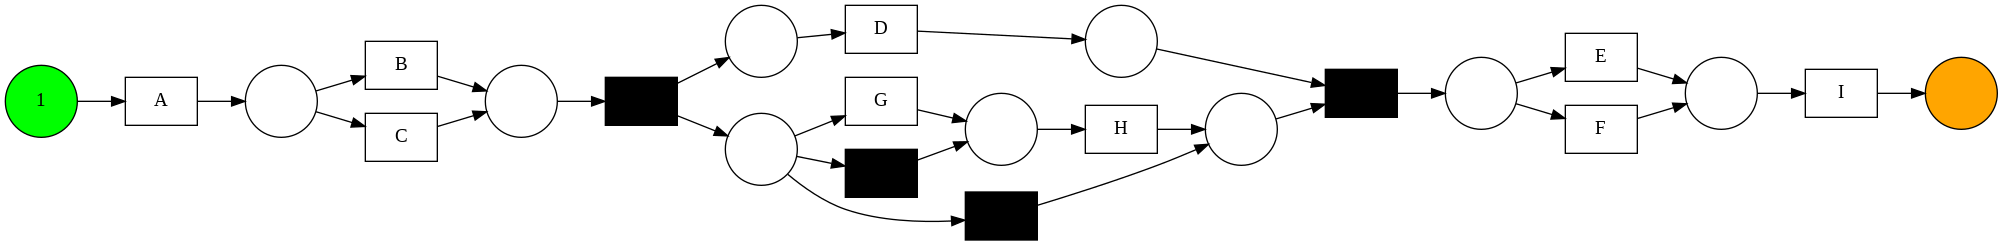

In [98]:
#!pip install pm4py

from google.colab import files
files.upload()
from pm4py.objects.petri.importer import importer as petri_importer
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.visualization.petrinet import visualizer as vizu

log = xes_importer.apply("./L1.xes")

from pm4py.algo.discovery.inductive import algorithm as inductive_miner
model, m0, mf = inductive_miner.apply(log)

from IPython.display import Image, display
display(Image(filename=vizu.apply(model,m0,mf).view(),width=800, height=200))

In [ ]:
for trace in log._list:
    print([activity['concept:name'] for activity in trace])
    
    #pip install pm4py
    #brew install graphviz

['A', 'C', 'G', 'D', 'H', 'F', 'I']
['A', 'C', 'D', 'H', 'F', 'I']
['A', 'C', 'H', 'D', 'F', 'I']
['A', 'B', 'D', 'E', 'I']
['A', 'C', 'D', 'G', 'H', 'F', 'I']


# 2. Fitness (4 points)

La librairie pm4py propose un module permettant de calculer les alignements :

In [ ]:
from pm4py.algo.conformance.alignments import algorithm as alignments

alignments = alignments.apply(log,model,m0,mf,variant = alignments.VERSION_DIJKSTRA_NO_HEURISTICS)

for alignment in alignments:
    print(alignment)

{'alignment': [('A', 'A'), ('C', 'C'), ('>>', None), ('G', 'G'), ('D', 'D'), ('H', 'H'), ('>>', None), ('F', 'F'), ('I', 'I')], 'cost': 2, 'visited_states': 9, 'queued_states': 31, 'traversed_arcs': 31, 'fitness': 1}
{'alignment': [('A', 'A'), ('C', 'C'), ('>>', None), ('D', 'D'), ('>>', None), ('H', 'H'), ('>>', None), ('F', 'F'), ('I', 'I')], 'cost': 3, 'visited_states': 12, 'queued_states': 36, 'traversed_arcs': 40, 'fitness': 1}
{'alignment': [('A', 'A'), ('C', 'C'), ('>>', None), ('>>', None), ('H', 'H'), ('D', 'D'), ('>>', None), ('F', 'F'), ('I', 'I')], 'cost': 3, 'visited_states': 10, 'queued_states': 31, 'traversed_arcs': 32, 'fitness': 1}
{'alignment': [('A', 'A'), ('B', 'B'), ('>>', None), ('D', 'D'), ('>>', None), ('>>', None), ('E', 'E'), ('I', 'I')], 'cost': 3, 'visited_states': 11, 'queued_states': 33, 'traversed_arcs': 37, 'fitness': 1}
{'alignment': [('A', 'A'), ('C', 'C'), ('>>', None), ('D', 'D'), ('G', 'G'), ('H', 'H'), ('>>', None), ('F', 'F'), ('I', 'I')], 'cost':

`# TODO` Expliquer deux alignements, leur coût et la fitness donnée. 


selon la doccumentation donnée l'attribut cost de chaque alignement correspond à :   



---


cost = "nombre de model move" *  1000 + "nombre de log move" * 0 + nombre de "synchronous moves" * 0  + nombre de "silent transitions" * 1



---


 l'attribut fitness est un float entre 0 à 1 qui nous aide à savoir si le modèle peut dérouler la trace. 
 si oui l'attribut fitness est de 1 sinon sa valeur est inférieure à 1


 La fitness vue dans le cours :  1 - somme_des_couts/(somme_transition+(nombre_de_traces*taille_du_run)) = 0

    
    Premier alignement :

Le premier alignement correspond à l'exécution de la première trace du log <A,C,G,D,H,F,I> dans le modèle.

dans le premier cas, le modèle arrive à dérouler la trace sans coût ce qui nous donne une fitness de 1.

l'attribut cost de cet alignement correspond à l'addition descouts des différentes transitions  0 model move + 0 log move + 0 * synchronous move + 1 * silent transition(2) = 2

la fitness dans ce cas est égale à 1.

    deuxième alignement :

Le deuxième cas ressemble au premier, ça correspond à l'exécution de la trace <A,C,D,H,F,I> dans le modèle.

l'attribut cost de cet alignement correspond à :  0 model move + 0 log move + 0 * synchronous move + 1 * silent transition(3) = 3

la fitness dans ce cas est égale à 1.


`# TODO` Modifier la fonction de coût des alignements pour qu'elle correspond aux coûts par default:
- log move = 1
- model move = 1
- synchronous move = 0
- silent transition = 0

In [ ]:
# TODO : modifier la fonction de coûts et relancer les alignments
from pm4py.algo.conformance.alignments import algorithm as alignments
from pm4py.algo.conformance.alignments.variants import state_equation_a_star

model_cost_function = dict()
sync_cost_function = dict()

for t in model.transitions:
    if t.label is not None:
        model_cost_function[t] = 1
        sync_cost_function[t] = 1
    else:
        model_cost_function[t] = 0

parameters= {}
parameters[state_equation_a_star.PARAM_MODEL_COST_FUNCTION] = model_cost_function
parameters[state_equation_a_star.PARAM_SYNC_COST_FUNCTION] = sync_cost_function

alignments = alignments.apply_log(log, model, m0, mf, parameters=parameters)

for alignment in alignments:
    print(alignment)

{'alignment': [('A', 'A'), ('C', 'C'), ('>>', None), ('G', 'G'), ('D', 'D'), ('H', 'H'), ('>>', None), ('F', 'F'), ('I', 'I')], 'cost': 0, 'queued_states': 20, 'visited_states': 10, 'closed_set_length': 10, 'num_visited_markings': 12, 'exact_heu_calculations': 1, 'fitness': 1}
{'alignment': [('A', 'A'), ('C', 'C'), ('>>', None), ('D', 'D'), ('>>', None), ('H', 'H'), ('>>', None), ('F', 'F'), ('I', 'I')], 'cost': 0, 'queued_states': 20, 'visited_states': 11, 'closed_set_length': 10, 'num_visited_markings': 12, 'exact_heu_calculations': 2, 'fitness': 1}
{'alignment': [('A', 'A'), ('C', 'C'), ('>>', None), ('>>', None), ('H', 'H'), ('D', 'D'), ('>>', None), ('F', 'F'), ('I', 'I')], 'cost': 0, 'queued_states': 20, 'visited_states': 11, 'closed_set_length': 10, 'num_visited_markings': 12, 'exact_heu_calculations': 2, 'fitness': 1}
{'alignment': [('A', 'A'), ('B', 'B'), ('>>', None), ('D', 'D'), ('>>', None), ('>>', None), ('E', 'E'), ('I', 'I')], 'cost': 0, 'queued_states': 18, 'visited_sta

`# TODO` Créer une fonction générique qui calcule la fitness vue en cours à l'aide des coûts trouvés par l'alignment.  

In [ ]:
# TODO : calcul de la fitness

from pm4py.objects.petri.importer import importer as petri_importer
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.visualization.petrinet import visualizer as vizu
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

#import the log to a new var so it doesn't mix with above exercices
log2 = xes_importer.apply("./L1.xes")


def fitness(model1, log1, m0e, mfe, parameters):
    from pm4py.algo.conformance.alignments import algorithm as alignments1
    #GET the log's alignments
    alignments1 = alignments1.apply(log1, model1, m0e, mfe, parameters = parameters)
    #declare our vars
    taille_min = 0
    taille_du_run = 0
    nombre_activitees = 0
    #calculate run size and number of activities
    for trace in log1:
        taille_du_run = len(trace)
        nombre_activitees = nombre_activitees + len(trace)
        if(taille_min != 0):
            if(taille_du_run<taille_min):
                taille_du_run = taille_min
        else:
            taille_min = taille_du_run
    
    nombre_de_traces = len(alignments1)
    #calculate the sum of costs
    somme_des_couts = 0
    for alignment in alignments1:
        somme_des_couts = somme_des_couts + alignment['cost']
    #decent print
    print("La somme des couts des traces: ", somme_des_couts)
    print("Taille de toutes les traces: ", nombre_activitees)
    print("Nombre de traces: ", nombre_de_traces)
    print("Taille du run: ", taille_du_run)

    #return fitness as we studied in BPA course
    return 1-somme_des_couts/(nombre_activitees+(nombre_de_traces*taille_du_run))

#apply inductive miner on the log so we can use the created fuction
model2, m01, mf1 = inductive_miner.apply(log2)

#apply the new fitness function
print('Fitness : ',fitness(model2, log2, m01, mf1, {}))



La somme des couts des traces:  0
Taille de toutes les traces:  31
Nombre de traces:  5
Taille du run:  7
Fitness :  1.0


`# TODO` Pour le même log, calculer la fitness pour un autre modèle que vous aurez découvert avec un autre algorithme. Expliquez votre démarche si le code Python n'est pas suffisant.  

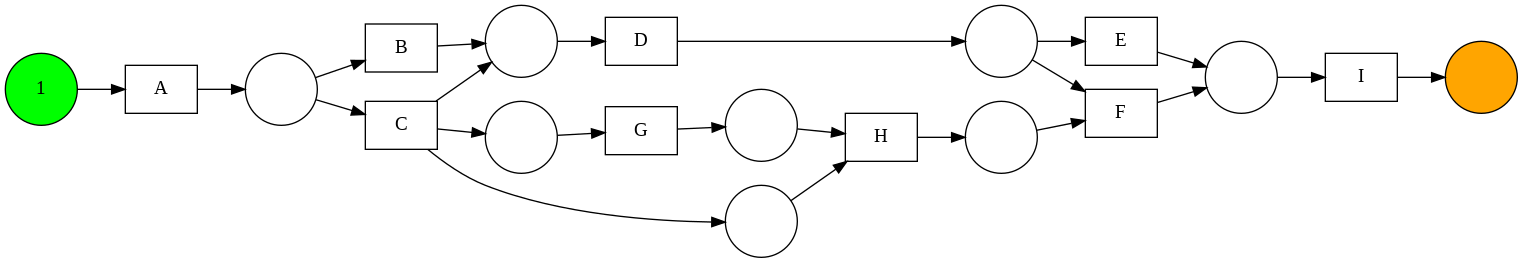

In [ ]:
# TODO : calculer la fitness d'un autre modèle

from pm4py.algo.discovery.alpha import algorithm as alpha_miner
modelAlpha, m0Alpha, mfAlpha = alpha_miner.apply(log)
Image(filename=vizu.apply(modelAlpha, m0Alpha, mfAlpha).view(),width=800, height=200)

L'algorithme choisi est l'alpha-miner

Nous pouvons remarquer temps qu'il n y a plus de silent transitions



In [ ]:
from pm4py.algo.conformance.alignments import algorithm as alignments

#Alignements avec l'algorithme alpha-miner
model_cost_function = dict()
sync_cost_function = dict()
for t in model.transitions:
    if t.label is not None:
        model_cost_function[t] = 1
        sync_cost_function[t] = 1
    else:
        model_cost_function[t] = 0

from pm4py.algo.conformance.alignments.variants import state_equation_a_star

parameters= {}
parameters[state_equation_a_star.PARAM_MODEL_COST_FUNCTION] = model_cost_function
parameters[state_equation_a_star.PARAM_SYNC_COST_FUNCTION] = sync_cost_function#

#alignments = alignments.apply_log(log, model, m0, mf, parameters=parameters)#
alignments_alpha = alignments.apply(log, modelAlpha, m0Alpha, mfAlpha)
for alignment1 in alignments_alpha:
    print(alignment1)

{'alignment': [('A', 'A'), ('C', 'C'), ('G', 'G'), ('D', 'D'), ('H', 'H'), ('F', 'F'), ('I', 'I')], 'cost': 0, 'queued_states': 20, 'visited_states': 8, 'closed_set_length': 8, 'num_visited_markings': 13, 'exact_heu_calculations': 1, 'fitness': 1}
{'alignment': [('A', 'A'), ('C', 'C'), ('>>', 'G'), ('D', 'D'), ('H', 'H'), ('F', 'F'), ('I', 'I')], 'cost': 10000, 'queued_states': 23, 'visited_states': 12, 'closed_set_length': 8, 'num_visited_markings': 13, 'exact_heu_calculations': 5, 'fitness': 0.9090909090909091}
{'alignment': [('A', 'A'), ('C', 'C'), ('>>', 'G'), ('H', 'H'), ('D', 'D'), ('F', 'F'), ('I', 'I')], 'cost': 10000, 'queued_states': 23, 'visited_states': 13, 'closed_set_length': 8, 'num_visited_markings': 12, 'exact_heu_calculations': 6, 'fitness': 0.9090909090909091}
{'alignment': [('A', 'A'), ('B', 'B'), ('D', 'D'), ('E', 'E'), ('I', 'I')], 'cost': 0, 'queued_states': 12, 'visited_states': 6, 'closed_set_length': 6, 'num_visited_markings': 7, 'exact_heu_calculations': 1, '

In [ ]:
#Calcul de fitness avec la fonction réalisée
print("La fitness du log sur le modèle généré par Alpha Miner avant le changement des couts:")
print(fitness(modelAlpha, log, m0Alpha, mfAlpha, {}))

La fitness du log sur le modèle généré par Alpha Miner avant le changement des couts:
La somme des couts des traces:  20000
Taille de toutes les traces:  31
Nombre de traces:  5
Taille du run:  7
-302.030303030303


In [ ]:
for transition in modelAlpha.transitions:
    
    # if the label is not None, we have a visible transition
    if transition.label is not None:
        model_cost_function[transition] = 1
        sync_cost_function[transition] = 0
    else:
        # associate cost 1 to each move-on-model associated to hidden transitions
        model_cost_function[transition] = 0

parameters = {}        
parameters[state_equation_a_star.PARAM_MODEL_COST_FUNCTION] = model_cost_function
parameters[state_equation_a_star.PARAM_SYNC_COST_FUNCTION] = sync_cost_function

print("La fitness log sur le modèle généré par Alpha Miner après le changement des couts:",fitness(modelAlpha, log, m0Alpha, mfAlpha, parameters))

La somme des couts des traces:  2
Taille de toutes les traces:  31
Nombre de traces:  5
Taille du run:  7
La fitness log sur le modèle généré par Alpha Miner après le changement des couts: 0.9696969696969697


# 3. Anti-alignment et précision (4 points)

Un anti-alignment est une execution du modèle qui maximise la distance minimale des traces à lui même. 

> Formal definition : 
> Given a finite collection $L$ of log traces and a model $N$, an anti-alignment is a run $u \in Runs(N)$ which maximizes its distance $\min_{\sigma \in L} dist(\sigma,u)$ to the log. 

La librairie da4py propose le calcul des anti-alignments:

In [29]:
!pip install da4py
!pip install python-sat

from da4py.main.conformanceChecking.conformanceArtefacts import ConformanceArtefacts

artefacts = ConformanceArtefacts()
artefacts.setDistance_type("edit")
artefacts.setSize_of_run(9)
artefacts.setMax_d(16)

# run an anti-Alignment
artefacts.antiAlignment(model,m0,mf,log)
print(artefacts.getRun())
print(artefacts.getTracesWithDistances()) 

['A', 'B', 'tauSplit_1', 'G', 'H', 'D', 'tauJoin_2', 'F', 'I']
   distance                 traces
0         4  [A, C, G, D, H, F, I]
1         5     [A, C, D, H, F, I]
2         3     [A, C, H, D, F, I]
3         4        [A, B, D, E, I]
4         4  [A, C, D, G, H, F, I]


Max_d est un paramètre permettant de borner le nombre de différence à trouver. Ceci est nécessaire pour des 
grosses bases de données. Modifier la valeur de Max_d et répondez aux questions : <br>
`# TODO ` : Donnez une valeur de max_d qui ne permet pas de trouver l'anti-alignement optimal pour ce problème. Expliquez. <br>

In [ ]:
#la valeur max_d qui nous permet d'avoir le pire résultat est la valeur 0
#le résultat donné nous montre clairement qu'il existe un run du log qui a une distance de 0 avec l'anti alignement 
#ce qui est contradictoire avec la définition même de l'anti-alignemlent qui représente le log le plus plus distant du run

from da4py.main.conformanceChecking.conformanceArtefacts import ConformanceArtefacts

artefacts = ConformanceArtefacts()
artefacts.setDistance_type("edit")
artefacts.setSize_of_run(9)
artefacts.setMax_d(10)

# run an anti-Alignment
artefacts.antiAlignment(model,m0,mf,log)
print(artefacts.getRun())
print(artefacts.getTracesWithDistances()) 

['A', 'B', 'tauSplit_1', 'G', 'H', 'D', 'tauJoin_2', 'F', 'I']
   distance                 traces
0         4  [A, C, G, D, H, F, I]
1         5     [A, C, D, H, F, I]
2         3     [A, C, H, D, F, I]
3         4        [A, B, D, E, I]
4         4  [A, C, D, G, H, F, I]


`# TODO` : Le paramètre `size_of_run` permet de calculer différentes tailles d'anti-alignment. Modifier ce paramêtre et concluez. 

In [67]:
#lors de la modification du Size of run la taille de l'anti alignement change avec et plus on augmente la taile du run plus on est précis
#dans le calcul de l'anti-alignement et on peut déduire que la meilleure taille du run est de 9

from da4py.main.conformanceChecking.conformanceArtefacts import ConformanceArtefacts

artefacts = ConformanceArtefacts()
artefacts.setDistance_type("edit")
artefacts.setSize_of_run(9)
artefacts.setMax_d(18)
#setSize_of_run maximise la taille du run
# run an anti-Alignment
artefacts.antiAlignment(model,m0,mf,log)
print(artefacts.getRun())
print(artefacts.getTracesWithDistances()) 

['A', 'B', 'tauSplit_1', 'G', 'H', 'D', 'tauJoin_2', 'F', 'I']
   distance                 traces
0         4  [A, C, G, D, H, F, I]
1         5     [A, C, D, H, F, I]
2         3     [A, C, H, D, F, I]
3         4        [A, B, D, E, I]
4         4  [A, C, D, G, H, F, I]


`# TODO ` : Quel est l'anti-alignement ? <br>

`# TODO ` : Créer une fonction permettant de calculer la précision comme vu en cours. Expliquez votre démarche. <br>

l'Anti alignement trouvé: ['A', 'C', 'tauSplit_1', 'G', 'H', 'D', 'tauJoin_2', 'E', 'I'] : <A,C,G,H,F,E,I>

In [118]:
# TODO : calcul de la precision
from da4py.main.conformanceChecking.conformanceArtefacts import ConformanceArtefacts

def precision(model1, log1, m0e, mfe):
   

    artefacts = ConformanceArtefacts()
    artefacts.setDistance_type("edit")
    artefacts.setSize_of_run(9)
    artefacts.setMax_d(10)

    artefacts.antiAlignment(model1,m0e,mfe,log1)
    tr = calcul_taille_run(artefacts)

    q = []
    s = []
    q=artefacts.getTracesWithDistances()
    for a in q['traces']:
        s.append(len(a))

    return 1-(min(s)/(2*tr))


def calcul_taille_run(artefacts):
    taille_min = 0
    size_of_run = 0
    for trace in artefacts.getTracesWithDistances().get("traces"):
        size_of_run = len(trace)
        if(taille_min != 0):
            if(size_of_run<taille_min):
              size_of_run = taille_min
        else:
            taille_min = size_of_run
    tr = taille_min-1
    return tr

print('La precision vue au cours : ', precision(model,log,m0,mf))
print('La precision automatique : ', artefacts.getPrecision())

La precision vue au cours :  0.5833333333333333
La precision automatique :  0.8


`# TODO ` : Modifier le réseau de Petri pour tenter d'améliorer la précision. (Voir `https://github.com/pm4py/pm4py-core/blob/release/pm4py/objects/petri/utils.py`)

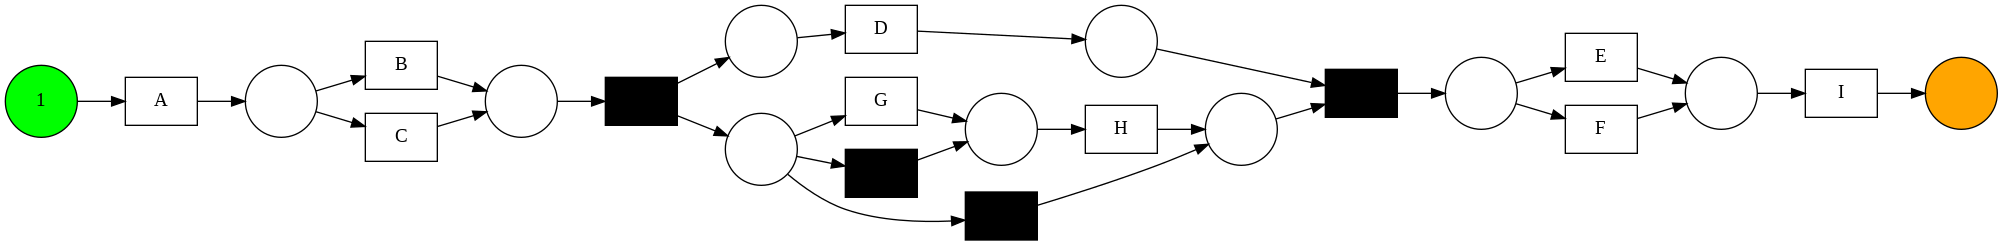

In [99]:
# modifier le modèle
log = xes_importer.apply("./L1.xes")

model
from IPython.display import Image
Image(filename=vizu.apply(model,m0,mf).view(),width=800, height=200)

In [102]:
# calculer sa nouvelle précision pour le log
artefacts = ConformanceArtefacts()
artefacts.setDistance_type("edit")
artefacts.setSize_of_run(10)
artefacts.setMax_d(10)
artefacts.antiAlignment(model,m0,mf,log)
print('La precision automatique : ', artefacts.getPrecision())


La precision automatique :  0.8


# 4. Multi-alignment (3 point)

Le module `da4py` propose une version "opposée" au anti-alignment appelé multi-alignment. Le code suivant montre un exemple. 

In [ ]:
artefacts = ConformanceArtefacts()
artefacts.setSize_of_run(9)
artefacts.setMax_d(20)

# run an multi-Alignment
artefacts.multiAlignment(model,m0,mf,log)
print(artefacts.getRun())
print(artefacts.getTracesWithDistances())

['A', 'C', 'tauSplit_1', 'D', 'skip_4', 'H', 'tauJoin_2', 'E', 'I']
   distance                 traces
0         3  [A, C, G, D, H, F, I]
1         2     [A, C, D, H, F, I]
2         4     [A, C, H, D, F, I]
3         3        [A, B, D, E, I]
4         3  [A, C, D, G, H, F, I]


`# TODO `: Donnez la définition d'un multi-alignment. <br>

 Multi-alignement
     
     Le multi-alignement est la notion opposée de l'anti-alignement.
     Pour un log de traces et un model donnés, le multi-alignement est la séquence la plus proche de toutes  les traces

`# TODO `: Que dire par rapport au multi-alignement trouvé ? 

    Multi alignement : <A,C,D,H,E,I>
    la somme des distances est élevée 3+2+4+3+3= 15 on peut déduire que ce n'est pas le résultat le plus optimale, d'ailleurs un simple 
    substitution du 'E' par 'F' pourrait nous donner de meilleurs résultats car le model passe plus de fois par F que par E à l'avant derniere étape
      

In [ ]:
artefacts = ConformanceArtefacts()
# maximise la somme et non le min
artefacts.setOptimizeSup(False)
artefacts.setSize_of_run(9)
artefacts.setMax_d(10)

# run an multi-Alignment
artefacts.multiAlignment(model,m0,mf,log)
print(artefacts.getRun())
print(artefacts.getTracesWithDistances())

['A', 'C', 'tauSplit_1', 'D', 'skip_4', 'H', 'tauJoin_2', 'F', 'I']
   distance                 traces
0         1  [A, C, G, D, H, F, I]
1         0     [A, C, D, H, F, I]
2         2     [A, C, H, D, F, I]
3         5        [A, B, D, E, I]
4         1  [A, C, D, G, H, F, I]


`# TODO `: setOptimizeSup(False) s'intéresse à la somme totale des différences. Observer les résultats et expliquer en d'autres termes. Donner une version mathématique. <br>
    
    La fonction setOptimizeSup() avec le paramètre FALSE permet de minimiser la somme des distance 
    au lieu de minimiser le maximum des distances.

    mathématiquement : min(somme(dist))
    
`# TODO `: Comparer avec le multi-alignement classique. 

    la somme des distances est visiblement inférieure dans ce cas à la somme des distances dans le multi-alignement précédent, résultat, avec set optimiser(false) on a un meliieur multi-alignement

# 5. Model-based Clustering (2 point)

Expliquer les paramètres et les résultats. Merci de ne pas copier simplement ceux de la documentation. 

In [ ]:
from da4py.main.analytics.amstc import samplingVariantsForAmstc

clustering=samplingVariantsForAmstc(model,m0,mf,log,10,9,0,9,3,maxCounter=1,silent_label="tau")


C'est une méthode de clustering de trace qui permet d'extraire les centres de gravité de subnets 'sous-réseaux' 
du 'model' qu'on a vu dans ce tp

**La description des variables :**

**model :** notre modele
**m0 :** état initial
**mf :** état final
**log :** traces du log en entrée
**arg5** sampleSize : nombre de traces utilisées dans l'éxemple ; dans ce cas sampleSize= 10 

**arg6** :sizeOfRun : longueur maximale requise pour calculer l'alignement; dans ce cas size   OfRun = 8

**arg7** :maxNbC : nombre maximal de transitions par cluster servant à éviter de tomber dans le cas d'avoir un centroid unique ; 

**arg8** :dans notre cas maxNbC = 5

**arg9** : nombre de clusters a trouver, comme on peut le voir en résultat après l'éxécution du code, on a 3 "clusters". 

**maxCounter :** nombre d'echec pour que l'algorithme s'arrete

**silent_label :** les transition qui auront un cout de zero, les transitions labelées "tau" dans notre cas couteront 0

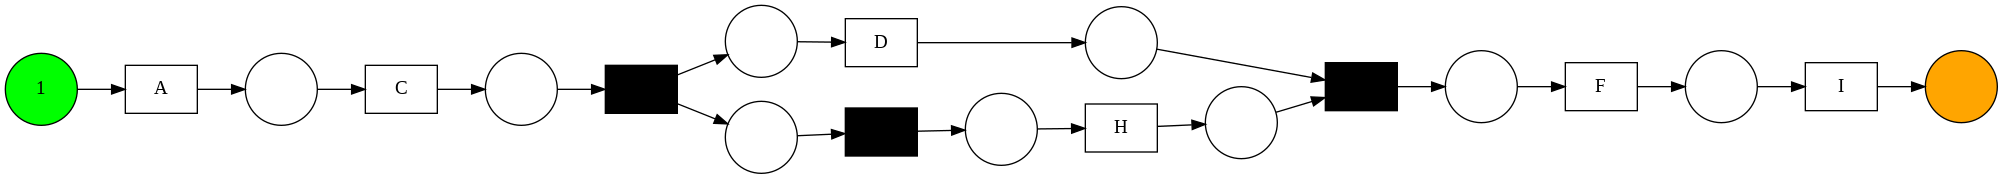

['A', 'C', 'D', 'H', 'F', 'I']
['A', 'C', 'H', 'D', 'F', 'I']


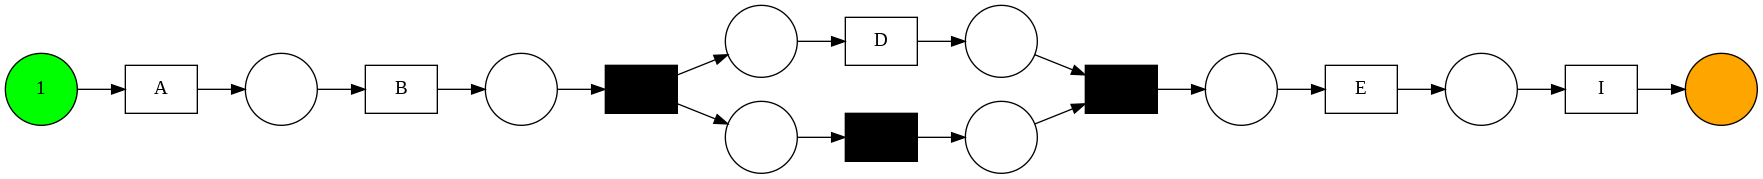

['A', 'B', 'D', 'E', 'I']


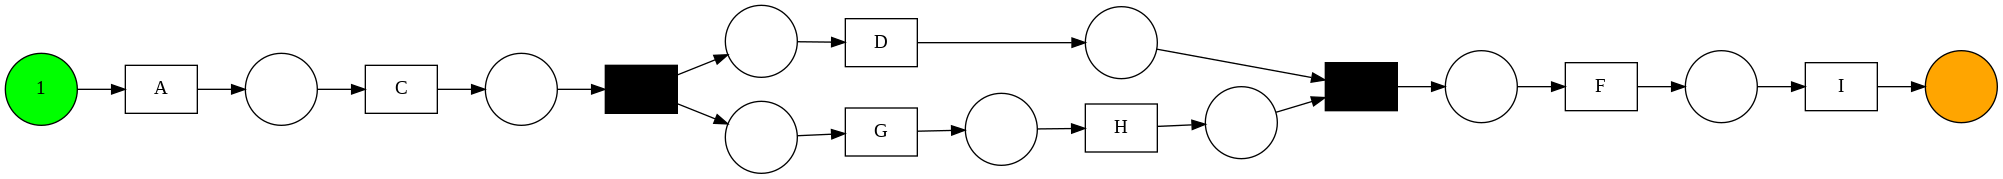

['A', 'C', 'G', 'D', 'H', 'F', 'I']
['A', 'C', 'D', 'G', 'H', 'F', 'I']


In [ ]:
for (centroid, traces) in clustering:
    if type(centroid) is tuple:
        c, c0,cf=centroid
        display(Image(filename=vizu.apply(c, c0,cf).view(),width=800, height=120))
        for trace in traces:
            print([activity['concept:name'] for activity in trace])

# 6. Real-life logs (7 points)
Dans cette section, je vous demande de trouver un jeu de données réel, de construire un modèle de processus (pas forcément avec pm4py mais obligatoirement un réseau de Petri) et de comparer le log et le modèle. La notation portera sur l'analyse et les démarches. 

- idée pour trouver des données de log (en xes en plus) https://data.4tu.nl/ 

Cet ensemble de données comprend des journaux d'événements (XES = Extensible Event Stream) 
concernant les activités de la vie quotidienne effectuées par plusieurs individus. 
Les journaux d'événements ont été dérivés de données de capteurs qui ont été collectées dans différents scénarios et représentent les activités de la vie quotidienne effectuées par plusieurs personnes. Ceux-ci comprennent par exemple le sommeil, la préparation des 
repas et le lavage. Les journaux d'événements montrent les différents comportements des personnes
dans leurs propres maisons.

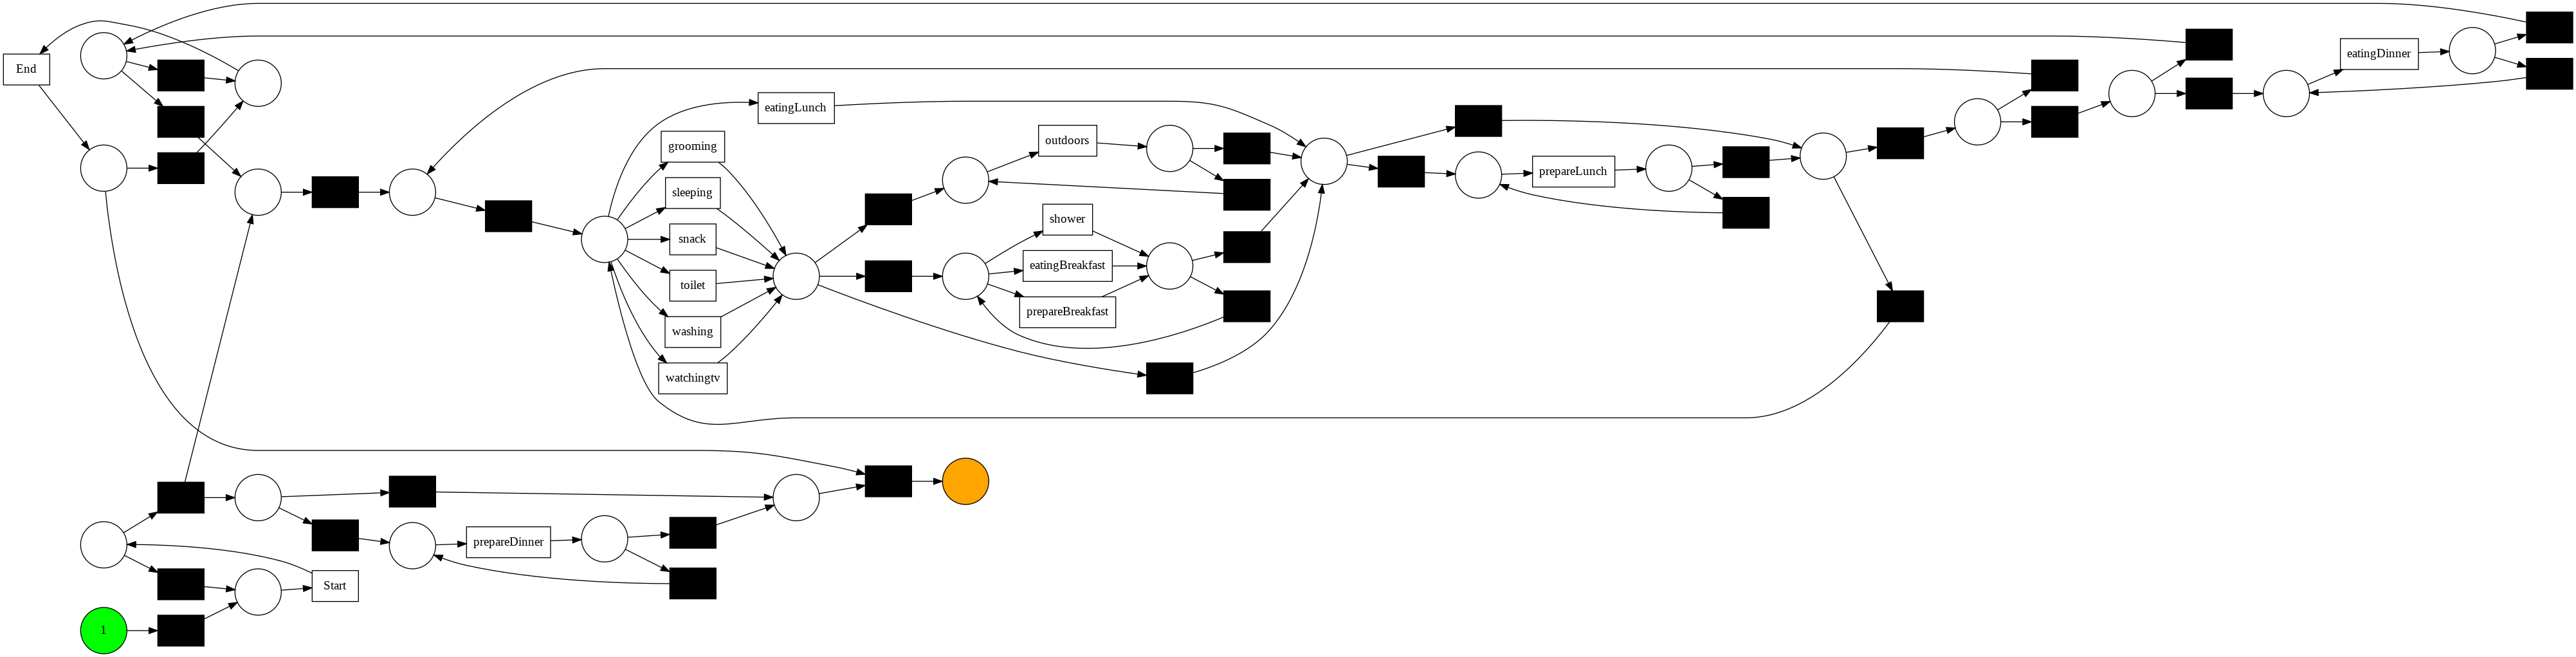

In [135]:
log = xes_importer.apply("./activitylog_uci_detailed_labour.xes")
model, m0, mf = inductive_miner.apply(log)
display(Image(filename=vizu.apply(model,m0,mf).view(),width=1900, height=400))

In [136]:
#pour afficher les traces du journal

for trace in log._list:
    print([activity['concept:name'] for activity in trace])
    

['Start', 'Start', 'washing', 'washing', 'watchingtv', 'watchingtv', 'toilet', 'toilet', 'washing', 'washing', 'toilet', 'toilet', 'sleeping', 'sleeping', 'toilet', 'toilet', 'prepareBreakfast', 'prepareBreakfast', 'eatingBreakfast', 'eatingBreakfast', 'watchingtv', 'watchingtv', 'washing', 'washing', 'shower', 'shower', 'grooming', 'grooming', 'washing', 'washing', 'grooming', 'grooming', 'washing', 'washing', 'watchingtv', 'watchingtv', 'snack', 'snack', 'toilet', 'toilet', 'washing', 'washing', 'watchingtv', 'watchingtv', 'prepareLunch', 'eatingLunch', 'prepareLunch', 'eatingLunch', 'watchingtv', 'watchingtv', 'snack', 'snack', 'toilet', 'washing', 'toilet', 'washing', 'watchingtv', 'watchingtv', 'outdoors', 'outdoors', 'watchingtv', 'watchingtv', 'toilet', 'washing', 'washing', 'toilet', 'grooming', 'grooming', 'watchingtv', 'watchingtv', 'snack', 'snack', 'watchingtv', 'watchingtv', 'washing', 'washing', 'grooming', 'grooming', 'prepareDinner', 'eatingDinner', 'prepareDinner', 'ea

In [137]:
alignments = alignments.apply(log,model,m0,mf,variant = alignments.VERSION_DIJKSTRA_NO_HEURISTICS)
#on affiche les alignements
for alignment in alignments:
    print(alignment)

{'alignment': [('>>', None), ('Start', 'Start'), ('>>', None), ('Start', 'Start'), ('>>', None), ('>>', None), ('>>', None), ('washing', 'washing'), ('>>', None), ('>>', None), ('>>', None), ('washing', 'washing'), ('>>', None), ('>>', None), ('>>', None), ('watchingtv', 'watchingtv'), ('>>', None), ('>>', None), ('>>', None), ('watchingtv', 'watchingtv'), ('>>', None), ('>>', None), ('>>', None), ('toilet', 'toilet'), ('>>', None), ('>>', None), ('>>', None), ('toilet', 'toilet'), ('>>', None), ('>>', None), ('>>', None), ('washing', 'washing'), ('>>', None), ('>>', None), ('>>', None), ('washing', 'washing'), ('>>', None), ('>>', None), ('>>', None), ('toilet', 'toilet'), ('>>', None), ('>>', None), ('>>', None), ('toilet', 'toilet'), ('>>', None), ('>>', None), ('>>', None), ('sleeping', 'sleeping'), ('>>', None), ('>>', None), ('>>', None), ('sleeping', 'sleeping'), ('>>', None), ('>>', None), ('>>', None), ('toilet', 'toilet'), ('>>', None), ('>>', None), ('>>', None), ('toilet', 

In [138]:
print('Fitness : ',fitness(model, log, m0, mf, {}))
#on affiche la fintess du model
#la fitness est de 1.0, c'est à dire qu'il est parfaitement fit

La somme des couts des traces:  0
Taille de toutes les traces:  1392
Nombre de traces:  25
Taille du run:  92
Fitness :  1.0


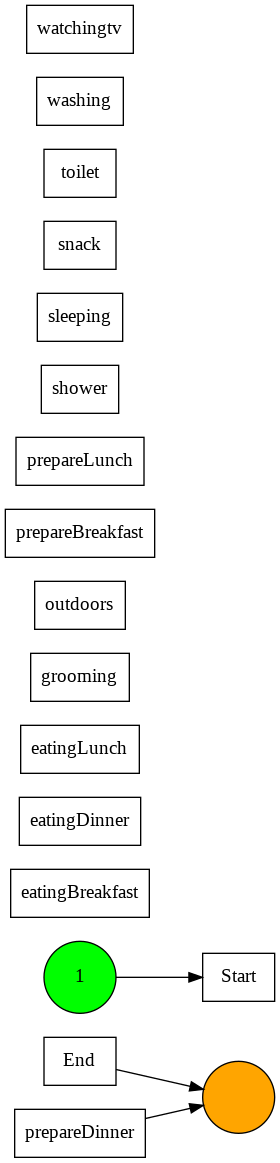

In [140]:
#on essaie l'algorithme alpha miner
from pm4py.algo.discovery.alpha import algorithm as alpha_miner1
modelAlpha, m0Alpha, mfAlpha = alpha_miner1.apply(log)
Image(filename=vizu.apply(modelAlpha, m0Alpha, mfAlpha).view(),width=300, height=800)

In [ ]:
artefacts.antiAlignment(model,m0,mf,log)
#pour les anti-aligments
print(artefacts.getRun())
print(artefacts.getTracesWithDistances()) 

['tau_1', 'Start', 'skip_6', 'init_loop_16', 'skip_9', 'init_loop_18', 'toilet', 'init_loop_25', 'outdoors', 'skip_27']


In [ ]:
artefacts.multiAlignment(model,m0,mf,log)
#on fait les multi alignements
print(artefacts.getRun())
print(artefacts.getTracesWithDistances())

In [ ]:
#Calcul de la précision
artefacts.setDistance_type("edit")
artefacts.setSize_of_run(0)
artefacts.setMax_d(10)
artefacts.antiAlignment(model,m0,mf,log)


print('La precision automatique : ', artefacts.getPrecision())